# Importing important libraries

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK, STATUS_RUNNING

In [27]:
df=pd.read_csv("data.csv")

# Splitting the dataset, analysis and cleaning

In [28]:
train=df[df["is_goal"].isna()==False]
train.shape

(24429, 28)

In [29]:
test=df[df["is_goal"].isna()==True]
test.shape

(6268, 28)

In [30]:
train.isna().sum()

In [31]:
train[["distance_of_shot","distance_of_shot.1"]]

In [32]:
train.drop(["Unnamed: 0","match_event_id","shot_id_number","team_id","match_id","lat/lng","team_name"],axis=1,inplace=True)
test.drop(["Unnamed: 0","match_event_id","shot_id_number","team_id","match_id","lat/lng","team_name"],axis=1,inplace=True)

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [33]:
train["remaining_min.1"].value_counts()
train["type_of_shot"].value_counts()

In [34]:
sns.countplot("is_goal",data=df,hue="type_of_combined_shot")

In [35]:
sns.barplot('match_event_id',data=train,hue="opponentteam")

In [36]:
# Creating seperate columns for indicating NA values
col=[cols for cols in train.columns]
col.remove("is_goal")
for col in col:
    train[col+"isna"]=train[col].isna()
    test[col+"isna"]=test[col].isna()

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [37]:
# Splitting a single column for generation of home-away teams and home/away games
lol=train["home/away"].str.split(" ",n=3,expand=True)
lol1=test["home/away"].str.split(" ",n=3,expand=True)

In [38]:
train["myteam"]=lol[0]
train["opponentteam"]=lol[2]
train["homeaway"]=lol[1]

test["myteam"]=lol1[0]
test["opponentteam"]=lol1[2]
test["homeaway"]=lol1[1]

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [39]:
#Mean and sum encoding different columns

groupbyareashotmean=train.groupby("area_of_shot")['is_goal'].mean()
train['groupbyareashotmean']=train["area_of_shot"].map(groupbyareashotmean)
test['groupbyareashotmean']=test["area_of_shot"].map(groupbyareashotmean)

groupbyareashotcount=train.groupby("area_of_shot")['is_goal'].sum()
train['groupbyareashotcount']=train["area_of_shot"].map(groupbyareashotcount)
test['groupbyareashotcount']=test["area_of_shot"].map(groupbyareashotcount)

groupbytype_of_shotmean=train.groupby("type_of_shot")['is_goal'].mean()
train['groupbytype_of_shotmean']=train["type_of_shot"].map(groupbytype_of_shotmean)
test['groupbytype_of_shotmean']=test["type_of_shot"].map(groupbytype_of_shotmean)

groupbytype_of_shotsum=train.groupby("type_of_shot")['is_goal'].sum()
train['groupbytype_of_shotsum']=train["type_of_shot"].map(groupbytype_of_shotsum)
test['groupbytype_of_shotsum']=test["type_of_shot"].map(groupbytype_of_shotsum)

groupbytype_of_shotcmean=train.groupby("type_of_combined_shot")['is_goal'].mean()
train['groupbytype_of_shotcmean']=train["type_of_combined_shot"].map(groupbytype_of_shotcmean)
test['groupbytype_of_shotcmean']=test["type_of_combined_shot"].map(groupbytype_of_shotcmean)

groupbytype_of_shotcsum=train.groupby("type_of_combined_shot")['is_goal'].sum()
train['groupbytype_of_shotcsum']=train["type_of_combined_shot"].map(groupbytype_of_shotcsum)
test['groupbytype_of_shotcsum']=test["type_of_combined_shot"].map(groupbytype_of_shotcsum)

groupbyhomeawaymean=train.groupby("homeaway")['is_goal'].mean()
train['groupbyhomeawaymean']=train["homeaway"].map(groupbyhomeawaymean)
test['groupbyhomeawaymean']=test["homeaway"].map(groupbyhomeawaymean)

groupbyhomeawaysum=train.groupby("homeaway")['is_goal'].sum()
train['groupbyhomeawaysum']=train["homeaway"].map(groupbyhomeawaysum)
test['groupbyhomeawaysum']=test["homeaway"].map(groupbyhomeawaysum)

groupbyopponentteammean=train.groupby("opponentteam")['is_goal'].mean()
train['groupbyopponentteammean']=train["opponentteam"].map(groupbyopponentteammean)
test['groupbyopponentteammean']=test["opponentteam"].map(groupbyopponentteammean)

groupbyopponentteamsum=train.groupby("opponentteam")['is_goal'].sum()
train['groupbyopponentteamsum']=train["opponentteam"].map(groupbyopponentteamsum)
test['groupbyopponentteamsum']=test["opponentteam"].map(groupbyopponentteamsum)

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [40]:
# Making separate columns for day, month and year of the game

import datetime
train["date_of_game"]=pd.to_datetime(train["date_of_game"])
test["date_of_game"]=pd.to_datetime(test["date_of_game"])

train["year"]=train["date_of_game"].dt.year
test["year"]=test["date_of_game"].dt.year

train["month"]=train["date_of_game"].dt.month
test["month"]=test["date_of_game"].dt.month

train.drop("date_of_game",axis=1,inplace=True)
test.drop("date_of_game",axis=1,inplace=True)

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

In [41]:
# Calculating and mean encoding age

train["Age"]=train["year"]-float(1985)
test["Age"]=test["year"]-float(1985)


groupbyagemean=train.groupby("Age")['is_goal'].mean()
train['groupbyagemean']=train["Age"].map(groupbyagemean)
test['groupbyagemean']=test["Age"].map(groupbyagemean)

groupbyagesum=train.groupby("Age")['is_goal'].sum()
train['groupbyagesum']=train["Age"].map(groupbyagesum)
test['groupbyagesum']=test["Age"].map(groupbyagesum)

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the

In [42]:
# Label Encoding categorical columns

from sklearn.preprocessing import LabelEncoder
columns=[cols for cols in train.select_dtypes(include=['O']).columns]
for c in columns:
    lbl=LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]=lbl.transform(list(train[c].values))
    test[c]=lbl.transform(list(test[c].values))

C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


# Modelling

In [18]:
# Splitting the dataset
X=train.drop("is_goal",axis=1)
y=train["is_goal"]

# Using Hyperopt for hyperparameter tuning

In [25]:
from sklearn.model_selection import KFold, StratifiedKFold,cross_val_score
import lightgbm
skf = KFold(n_splits=5)

def objective(params):
    params = {
        'max_depth': int(params['max_depth']),
        'num_leaves': int(params['num_leaves']),
        'bagging_fraction': "{:.3f}".format(params['bagging_fraction']),
        'learning_rate': "{:.3f}".format(params['learning_rate']),
        'bagging_freq': int(params['bagging_freq']),
        'feature_fraction': '{:.3f}'.format(params['feature_fraction']),


    }
    
    clf = lightgbm.LGBMClassifier(
        n_estimators=2000, 
        objective="binary", # Seting model to run on GPU
        **params
        )
    
    # clf.fit(X_train, y_train)
    # y_pred_train = clf.predict_proba(X_val)[:,1]
    # score = roc_auc_score(y_val, y_pred_train)
    score = cross_val_score(clf, X, y, scoring='roc_auc', cv=skf).mean() #Using the TimeSeriesSplit
    print(f'ROC AUC CV-Score: {score}')    
    # print("Accuracy {:.8f} params {}".format(-score, params))
    
    return -score

space = {
    'max_depth': hp.randint('max_depth',20),
    'num_leaves':  hp.randint('num_leaves',300),
    'bagging_fraction': hp.uniform('bagging_fraction', 0.2, 1.0),
    'learning_rate': hp.uniform('learning_rate', 0.001, 0.2),
    'bagging_freq': hp.randint('bagging_freq',40),
    'feature_fraction': hp.uniform('feature_fraction', 0.3, 1.0),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=15)

ROC AUC CV-Score: 0.6145614056494433                                                                                   
ROC AUC CV-Score: 0.6488254567092978                                                                                   
ROC AUC CV-Score: 0.6117936382328661                                                                                   
ROC AUC CV-Score: 0.6149604219314575                                                                                   
ROC AUC CV-Score: 0.6242459741250703                                                                                   
ROC AUC CV-Score: 0.6142814014104631                                                                                   
ROC AUC CV-Score: 0.6259413293679639                                                                                   
ROC AUC CV-Score: 0.6199019464383951                                                                                   
ROC AUC CV-Score: 0.643775034718358     

In [26]:
# Finding out best parameters
print("BEST PARAMS: ", best)

BEST PARAMS:  {'bagging_fraction': 0.8488848775507463, 'bagging_freq': 10, 'feature_fraction': 0.36742832381321716, 'learning_rate': 0.0431385893384868, 'max_depth': 2, 'num_leaves': 297}


In [63]:
param1={'bagging_fraction': 0.8488848775507463, 'bagging_freq': 10, 'feature_fraction': 0.36742832381321716, 'learning_rate': 0.0431385893384868, 'max_depth': 2, 'num_leaves': 297,"objective" : 'binary','metric': 'auc'}

In [49]:
test.drop("is_goal",axis=1,inplace=True)

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


[    0     2     3 ... 24425 24426 24428]
LGB 0--------------------------------------------------
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[254]	training's auc: 0.669815	valid_1's auc: 0.656064
[    1     2     3 ... 24426 24427 24428]
LGB 1--------------------------------------------------
Training until validation scores don't improve for 400 rounds.
Early stopping, best iteration is:
[370]	training's auc: 0.675637	valid_1's auc: 0.66201
[    0     1     2 ... 24426 24427 24428]
LGB 2--------------------------------------------------
Training until validation scores don't improve for 400 rounds.
[1000]	training's auc: 0.703945	valid_1's auc: 0.652991
Early stopping, best iteration is:
[1014]	training's auc: 0.704503	valid_1's auc: 0.653064
[    0     1     4 ... 24426 24427 24428]
LGB 3--------------------------------------------------
Training until validation scores don't improve for 400 rounds.
[1000]	training's auc: 0.70422

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


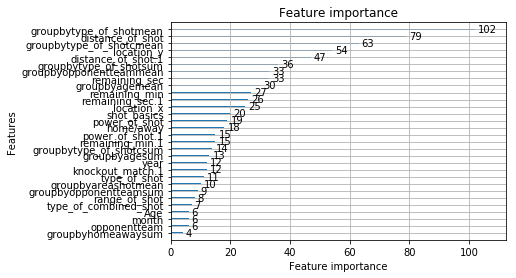

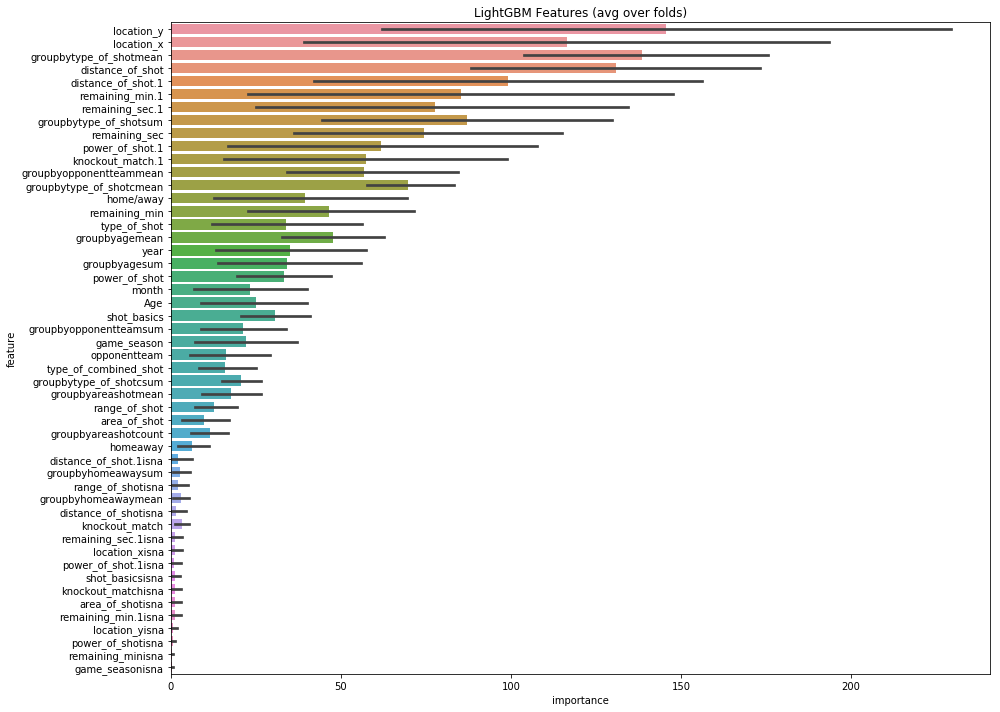

In [64]:
# Modelling with LightGBM and getting feature importance
from sklearn.model_selection import KFold, StratifiedKFold
import lightgbm as lgb
FOLDs = StratifiedKFold(n_splits=5, shuffle=True, random_state=7)

oof_lgb = np.zeros(len(X))
predictions_lgb = np.zeros(len(test))

features_lgb = list(X.columns)
feature_importance_df_lgb = pd.DataFrame()

for fold_, (trn_idx, val_idx) in enumerate(FOLDs.split(X, y)):
    trn_data = lgb.Dataset(X.iloc[trn_idx], label=y.iloc[trn_idx])
    val_data = lgb.Dataset(X.iloc[val_idx], label=y.iloc[val_idx])
    print(trn_idx)

    print("LGB " + str(fold_) + "-" * 50)
    num_round = 20000
    clf = lgb.train(param1,trn_data, num_round, valid_sets = [trn_data, val_data], verbose_eval=1000, early_stopping_rounds = 400)
    oof_lgb[val_idx] = clf.predict(X.iloc[val_idx], num_iteration=clf.best_iteration)
    predictions_lgb += clf.predict(test, num_iteration=clf.best_iteration) / FOLDs.n_splits
    fold_importance_df_lgb = pd.DataFrame()
    fold_importance_df_lgb["feature"] = features_lgb
    fold_importance_df_lgb["importance"] = clf.feature_importance()
    fold_importance_df_lgb["fold"] = fold_ + 1
    feature_importance_df_lgb = pd.concat([feature_importance_df_lgb, fold_importance_df_lgb], axis=0)
    
lgb.plot_importance(clf, max_num_features=30)    
cols = feature_importance_df_lgb[["feature", "importance"]].groupby("feature").mean().sort_values(by="importance", ascending=False)[:50].index
best_features_lgb = feature_importance_df_lgb.loc[feature_importance_df_lgb.feature.isin(cols)]
plt.figure(figsize=(14,10))
sns.barplot(x="importance", y="feature", data=best_features_lgb.sort_values(by="importance", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()
plt.savefig('lgbm_importances.png')


# Using H2O AutoML

In [19]:
import h2o
from h2o.automl import H2OAutoML

In [20]:
h2o.cluster().shutdown()

AttributeError: 'NoneType' object has no attribute 'shutdown'

In [22]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 12.0.2+10, mixed mode, sharing)
  Starting server from C:\Users\Sreyan\Anaconda3\envs\AI2\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\Sreyan\AppData\Local\Temp\tmpv1rvry6s
  JVM stdout: C:\Users\Sreyan\AppData\Local\Temp\tmpv1rvry6s\h2o_Sreyan_started_from_python.out
  JVM stderr: C:\Users\Sreyan\AppData\Local\Temp\tmpv1rvry6s\h2o_Sreyan_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.26.0.1
H2O cluster version age:,5 days
H2O cluster name:,H2O_from_python_Sreyan_t96nzk
H2O cluster total nodes:,1
H2O cluster free memory:,3.963 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"accepting new members, healthy"


In [43]:
train.to_csv("train1.csv",index=False)
test.to_csv("test1.csv",index=False)

In [44]:
train=h2o.import_file("train1.csv")
test=h2o.import_file("test1.csv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [45]:
x = train.columns
y = "is_goal"
x.remove(y)

In [ ]:
aml = H2OAutoML(max_models=30, seed=42,max_runtime_secs=7200,project_name="ZS_Challenge",max_runtime_secs_per_model=400)
aml.train(x=x, y=y, training_frame=train)

AutoML progress: |███████████████████████████████████████████████████████

# Creating submission file

In [93]:
lol=pd.DataFrame(predictions_lgb)
lol.to_csv("sub1.csv")

In [94]:
haha=pd.read_csv("sample_submission.csv")
df=pd.read_csv("data.csv")
number=[i for i in range(1,len(df)+1)]
df["shot_id_number"]=number
test=df[df["is_goal"].isna()==True]

In [95]:
test["is_goal"]=(predictions_lgb>0.5).astype(np.int)

C:\Users\Sreyan\Miniconda3\envs\AI\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [96]:
submit=test[["shot_id_number","is_goal"]]

In [97]:
haha.drop("is_goal",axis=1,inplace=True)

In [98]:
lolwa=pd.merge(haha,submit,how="inner",on=["shot_id_number"])

In [100]:
lolwa.to_csv("submission2.csv")